<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/charting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
!pip install yfinance
!pip install mplfinance

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import json
import requests
import urllib.parse
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2022-10-03 00:00:00-04:00
True
nan


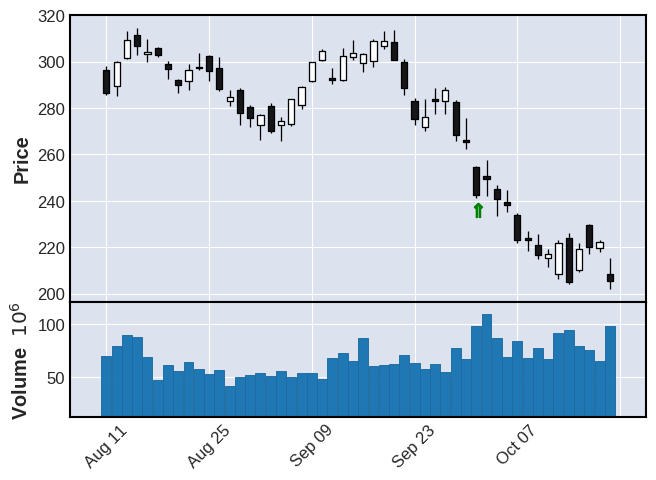

In [94]:
df = yf.Ticker('TSLA').history('50d', actions=False)

print(df.loc['2022-10-03 00:00:00-04:00'].name)
print(df.loc['2022-10-03 00:00:00-04:00'].name==pd.to_datetime('2022-10-03 00:00:00-04:00'))


print(np.where(df.loc['2022-10-03 00:00:00-04:00'].name=='2022-10-03 00:00:00-04:00', 1, np.nan))
buy = np.where(df.index=='2022-10-03 00:00:00-04:00', 1, np.nan) * 0.98 * df['Low']
apd = [mpf.make_addplot(buy, scatter=True, markersize=100, marker=r'$\Uparrow$', color='green')]
mpf.plot(df, type='candle', volume=True, addplot=apd)


In [3]:
#  create function to plot market and indexes
def plotPerformance(arg):
    df = arg
    df.info()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()
print('function plotPerformance created')

function plotPerformance created


In [116]:
#tsla=yf.Ticker("ENPH").history('5y')
#mpf.plot(tsla['2021-01-01':'2022-09-10'])

#tsla.to_csv('tsla.csv')
# df=pd.read_csv('patterns.csv')
r = requests.get('https://194c-207-253-236-153.ngrok.io/search?mock=true&q=%5Bd%5DO.0+%2F+%5Bd%5DC.1+%3E+1.1%0D%0AAND+%5Bd%5DC.0+%3E+%5Bd%5DAVGC20.0+')
df = pd.DataFrame(r.json()['payload'])
df.info()
df['patternTime'] = pd.to_datetime(df['patternTime'])
df['patternTimeFrom'] = df['patternTime'] + pd.DateOffset(days=-60)
df['patternTimeTo'] = df['patternTime'] + pd.DateOffset(days=100)
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   symbol       2 non-null      object
 1   patternTime  2 non-null      object
dtypes: object(2)
memory usage: 160.0+ bytes
  symbol patternTime patternTimeFrom patternTimeTo
0   TSLA  2022-07-12      2022-05-13    2022-10-20
1   ENPH  2022-08-31      2022-07-02    2022-12-09


<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2022-05-13 00:00:00-04:00  257.826660  262.450012  250.523331  256.529999   
2022-05-16 00:00:00-04:00  255.720001  256.586670  239.696671  241.456665   
2022-05-17 00:00:00-04:00  249.119995  254.826660  242.949997  253.869995   
2022-05-18 00:00:00-04:00  248.173340  253.500000  233.603333  236.603333   
2022-05-19 00:00:00-04:00  235.666672  244.666672  231.369995  236.473328   
...                               ...         ...         ...         ...   
2022-10-13 00:00:00-04:00  208.300003  222.990005  206.220001  221.720001   
2022-10-14 00:00:00-04:00  224.009995  226.259995  204.160004  204.990005   
2022-10-17 00:00:00-04:00  210.039993  221.860001  209.449997  219.350006   
2022-10-18 00:00:00-04:00  229.500000  229.820007  217.250000  220.190002   
2022-10-19 00:00:00-04:00  219.800003  222.9

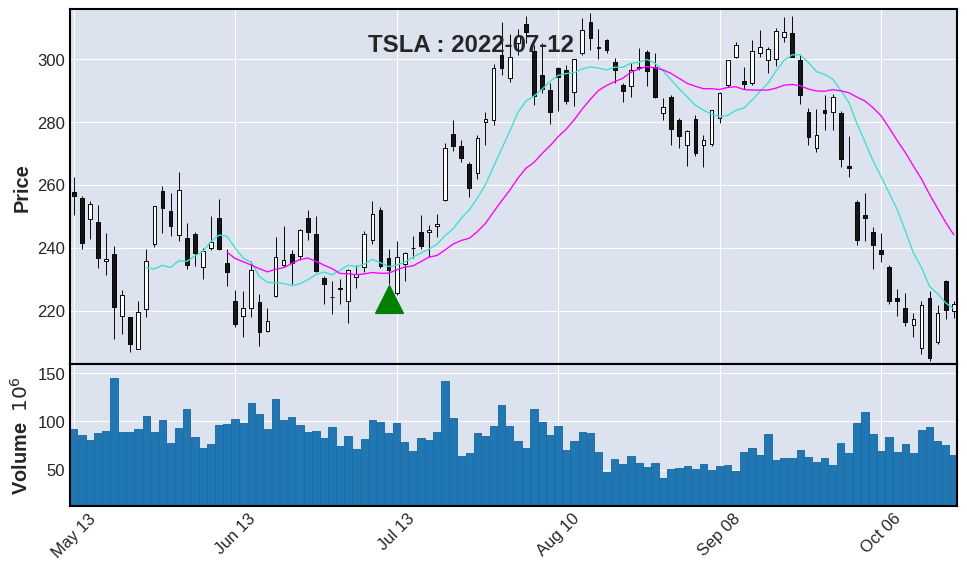

<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2022-07-05 00:00:00-04:00  190.070007  193.639999  179.199997  192.589996   
2022-07-06 00:00:00-04:00  193.440002  199.410004  190.089996  194.929993   
2022-07-07 00:00:00-04:00  199.369995  212.889999  198.639999  206.839996   
2022-07-08 00:00:00-04:00  204.809998  219.089996  200.910004  216.449997   
2022-07-11 00:00:00-04:00  214.610001  214.869995  203.509995  206.059998   
...                               ...         ...         ...         ...   
2022-10-14 00:00:00-04:00  249.000000  254.210007  237.259995  237.869995   
2022-10-17 00:00:00-04:00  244.899994  250.240005  238.880005  242.289993   
2022-10-18 00:00:00-04:00  250.630005  254.000000  245.259995  251.419998   
2022-10-19 00:00:00-04:00  247.500000  247.600006  238.860001  243.190002   
2022-10-20 00:00:00-04:00  242.490005  247.6

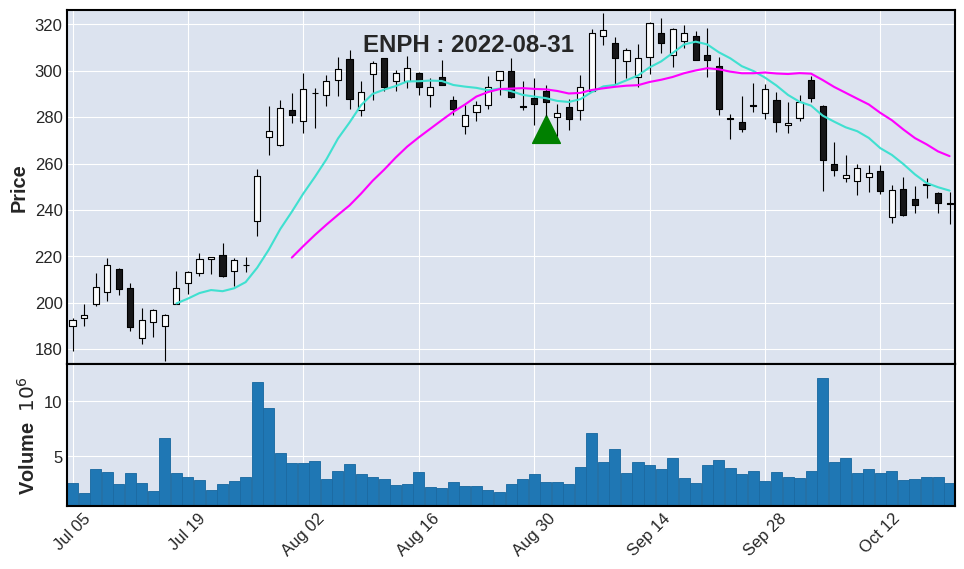

In [113]:
for index, row in df.iterrows():
    
    start=row['patternTimeFrom'].strftime('%Y-%m-%d')
    end=row['patternTimeTo'].strftime('%Y-%m-%d')

# urllib.parse.quote(query)

    chartResponse = requests.get('https://194c-207-253-236-153.ngrok.io/chart/TSLA/d?from=2022-02-01T00%3A00%3A00&to=2022-05-30T00%3A00%3A00')
    chartDf = pd.json_normalize(json.loads(chartResponse.text))
    chartDf.info

    ticker=yf.Ticker(row['symbol']).history('5y', start=start, end=end, actions=False)

    # ticker.info

    entry = row['patternTime'].strftime('%Y-%m-%d %H:%M:%S-04:00')

    buy = np.where(ticker.index==entry, 1, np.nan) * 0.98 * ticker['Low']
    apd = [mpf.make_addplot(buy, scatter=True,  type='scatter', markersize=400, marker='^', color='green')]

    mpf.plot(ticker[start:end], type='candle', 
         volume=True, mav=(10,20),title = row['symbol'] + ' : ' + row['patternTime'].strftime('%Y-%m-%d'),
        tight_layout=True, figratio=(16,9), addplot=apd)
    
    # plotPerformance(ticker)
